## 📊 Summary of Report and Findings:
Choosing the Right Regression Model, Regularization Techniques, and Hyperparameter Tuning Using the Insurance Dataset
This report presents a detailed exploration of Linear and Polynomial Regression models using the US Health Insurance Dataset (Kaggle Dataset), inspired by the Data Science World YouTube channel.

## 🔍 Objective:
To understand how to select the most suitable regression model (Linear vs. Polynomial), and how to apply regularization techniques and hyperparameter tuning to improve model performance. The analysis is guided by linearity assumptions, feature correlation, and model evaluation metrics.



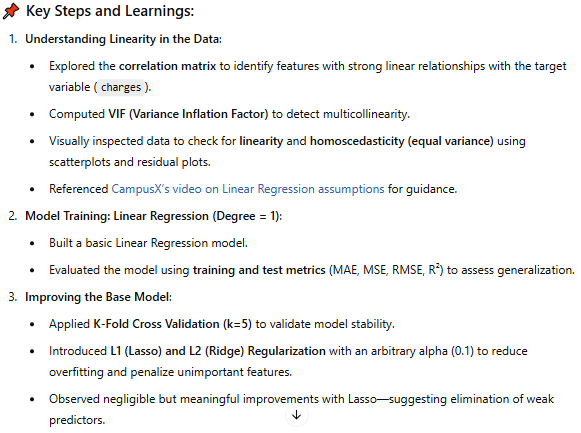 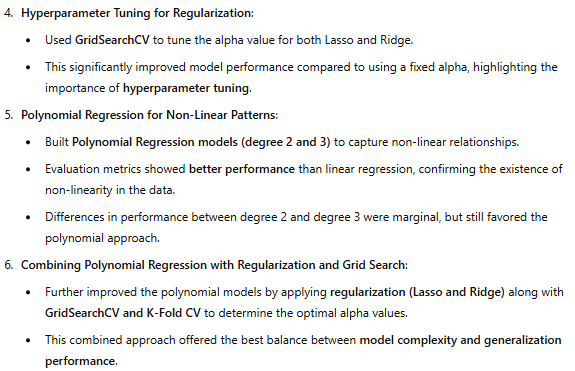 

##### 7. Built a Decision Tree Regressor with hyperparameter tuning using cross-validation (cv=5), which delivered strong performance on the dataset.

##### 8. Tested Support Vector Regression (SVR) with a linear kernel, but the model's performance was limited due to its inability to capture non-linear relationships.

##### 9. Trained SVR with a polynomial kernel, which led to an improvement in model performance, achieving an R² score of 0.86.

##### 10. Implemented SVR with a Radial Basis Function (RBF) kernel, resulting in further performance gains with an R² score of 0.87.

##### 11. Performed hyperparameter tuning (C, gamma, epsilon) on the RBF SVR model, slightly boosting performance to an R² score of 0.8655.

##### 12. Concluded that SVR with an RBF kernel is particularly effective for small datasets with non-linear patterns, making it a highly suitable choice for such scenarios.











In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Resource for the selection of the best dataset - https://youtu.be/1t4GZKrvzmA?si=6eYlei9ZlRWBPhFC
- Thanks to YouTube channel: Data Science World

dataset : https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

In [6]:
df = pd.read_csv("insurance.csv")

In [7]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [9]:
print(df["charges"].mean())


13270.422265141257


## Data Encoding

In [11]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [12]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [13]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
import pandas as pd

# Copy of original DataFrame to preserve original data
df_encoded = df.copy()

# Label Encoding for 'sex' and 'smoker'
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})

# Manual Mapping for 'region'
region_mapping = {
    'southwest': 1,
    'southeast': 2,
    'northwest': 3,
    'northeast': 4
}
df_encoded['region'] = df_encoded['region'].map(region_mapping)

# Display the first 5 rows of the encoded DataFrame
df_encoded.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [15]:
df_encoded["region"].unique()

array([1, 2, 3, 4], dtype=int64)

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [17]:
# # List of columns to drop
# columns_to_drop = ['region_northwest', 'region_southeast','region_southwest']

# # Drop the columns from the DataFrame
# df_cleaned = df_encoded.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
df_cleaned = df_encoded


In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Reffered Resource --> Assumptions for Linearity Youtube Resource : https://youtu.be/EmSNAtcHLm8?si=kvb7n2CyJUKDYAHR

- Thanks to Campusx for detailed video on the same topic (Assumptions for Linearity)

## Check for the features having linear relation with the target variable

In [21]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Display the correlation matrix
correlation_matrix["charges"]


age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region      0.006208
charges     1.000000
Name: charges, dtype: float64

- Correlation only measures linear relationship between a feature and the target.

- It doesn't account for interactions between features or non-linear relationships.

- Some features might have low individual correlation, but add value in combination with others.

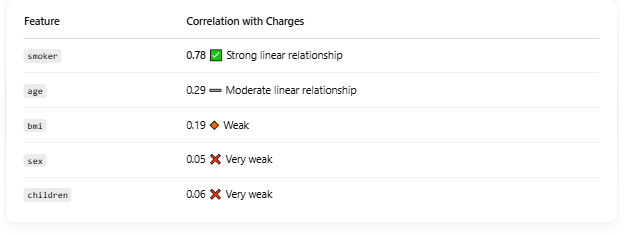

- Low correlation does not mean a feature is useless — just that it might not have a linear relationship with the target.

- Some features may have non-linear effects or interact with other features.

- To confirm whether features are redundant due to multicollinearity, we use Variance Inflation Factor (VIF) — not to confirm non-linearity, but to check how much a feature is linearly correlated with other independent features.


In [25]:
# Features (independent variables)
X = df_cleaned.drop('charges', axis=1)

# Target (dependent variable)
y = df_cleaned['charges']

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Add constant column for intercept
X_const = add_constant(X)

# Step 2: Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Step 3: Display the VIF scores
vif_data

,Feature,VIF
0,const,42.188974
1,age,1.015394
2,sex,1.008889
3,bmi,1.040608
4,children,1.002482
5,smoker,1.006466
6,region,1.025966


In [27]:
vif_data = vif_data[vif_data["Feature"] != "const"]


In [28]:
vif_data

,Feature,VIF
1,age,1.015394
2,sex,1.008889
3,bmi,1.040608
4,children,1.002482
5,smoker,1.006466
6,region,1.025966


- Hence Multicolinearity is NOT present

## Visually Check if the data follows Linearity

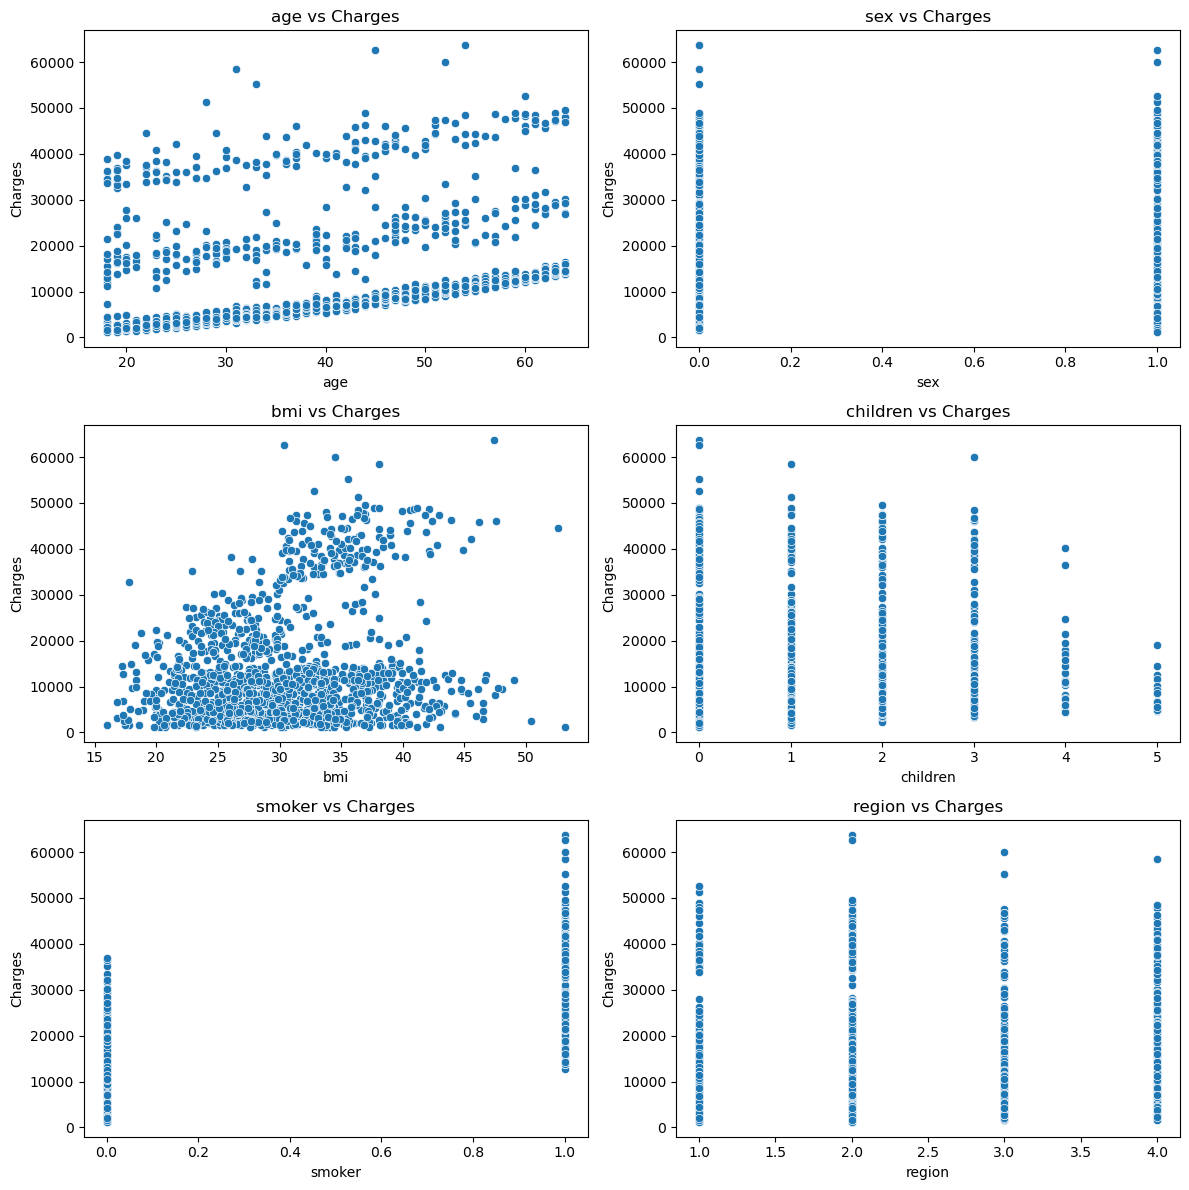

In [31]:
# Visual inspection for Linearity

# Get the number of features
num_features = len(X.columns)

# Set up subplot grid (let's use 2 columns)
cols = 2
rows = (num_features + 1) // cols

# Set figure size
plt.figure(figsize=(12, 4 * rows))

# Create subplots
for i, column in enumerate(X.columns):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=X[column], y=y)
    plt.title(f'{column} vs Charges')
    plt.xlabel(column)
    plt.ylabel('Charges')

# Adjust layout
plt.tight_layout()
plt.show()

- Through visual inspection we cannot get if the data is Linear  or non linear in nature

In [33]:
from sklearn.preprocessing import StandardScaler
# Step 1: Standardize the feature data (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your original DataFrame

In [34]:
from sklearn.model_selection import train_test_split
# Step 2: Split the standardized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
# Step 3: Fit Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Step 4: Predict on test data
y_pred = model.predict(X_test)


## Visually Check for Homoscedasticity (Equal Variance)

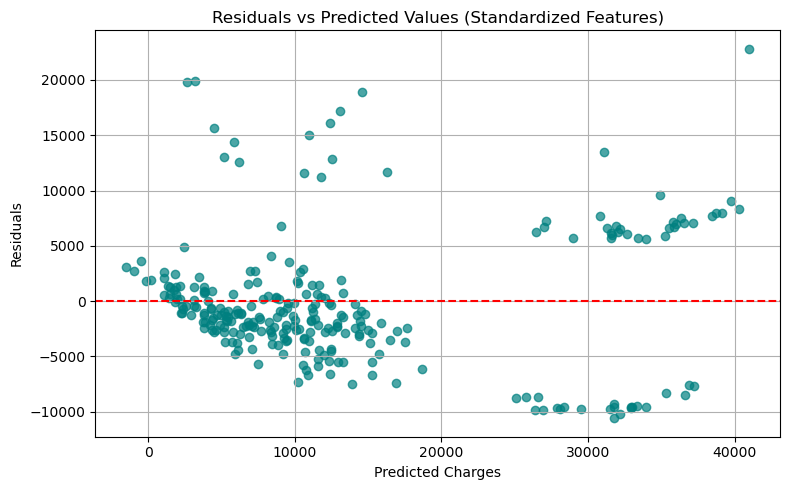

In [38]:
# Step 5: Calculate residuals
residuals = y_test - y_pred

# Step 6: Scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color='teal')
plt.axhline(y=0, color='red', linestyle='--')  # horizontal line at 0
plt.title('Residuals vs Predicted Values (Standardized Features)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

- So we dont see any pattern in the rsiduals , so it sustaains with the Linearity Assumption i.r., Homoscedasticity (Equal Variance)


Conclusion:

- The correlation matrix showed that some features have a strong linear relationship with the target variable, while others do not.
- Other assumptions of linearity (such as linearity of residuals, homoscedasticity, no multicollinearity, and normality of errors) were satisfied.
- However, due to mixed correlation strengths across features, it's uncertain whether a Linear Regression model will perform best, or whether Polynomial Regression or another non-linear model (like Decision Trees, Random Forests, etc.) might be more appropriate.

Reason:
- Correlation Matrix Insight: It's common that not all features show a strong linear correlation. Some features might influence the target in non-linear ways or interact with others.
- Assumptions Check: If all other assumptions for linear regression are satisfied (besides linearity of some features), it's valid to explore alternative models.
- Model Choice: You're right to be cautious. When some features aren't linearly related to the target, Polynomial Regression, Regularization, or even non-linear models (like SVR, Tree-based models) could perform better.



## Linear Regression Degree =1

In [42]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Step 2: Print results
print("Model Evaluation Metrics for the Test data:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics for the Test data:
Mean Absolute Error (MAE): 4186.51
Mean Squared Error (MSE): 33635210.43
Root Mean Squared Error (RMSE): 5799.59
R² Score: 0.7833


### Comapring Training and Test Data Metrics to Determine if the model is well generalised when trained on Linear Regression Degree =1

In [44]:
# Step 1: Predict on training data
y_train_pred = model.predict(X_train)

# Step 2: Calculate evaluation metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Step 3: Print training evaluation metrics
print("Training Data Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R² Score: {r2_train:.4f}")

Training Data Evaluation Metrics:
Mean Absolute Error (MAE): 4208.76
Mean Squared Error (MSE): 37280663.22
Root Mean Squared Error (RMSE): 6105.79
R² Score: 0.7417


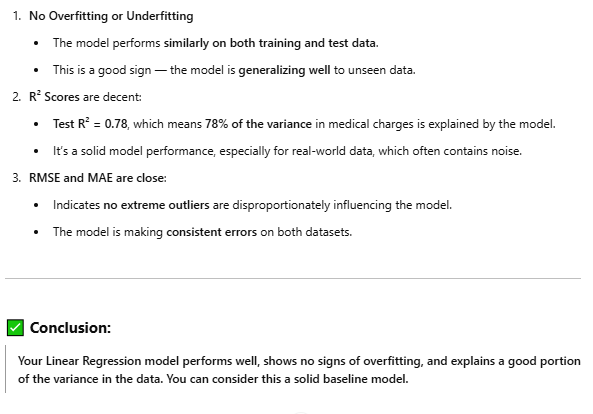

## Check for the Scope for Improving the Model

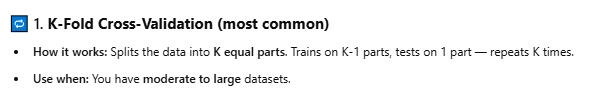 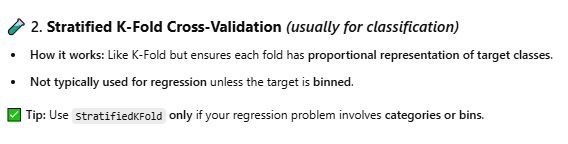
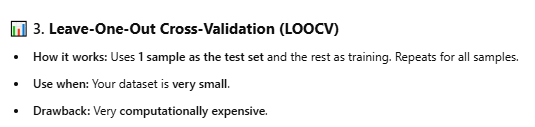 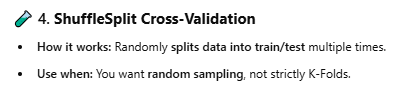
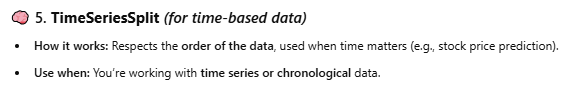 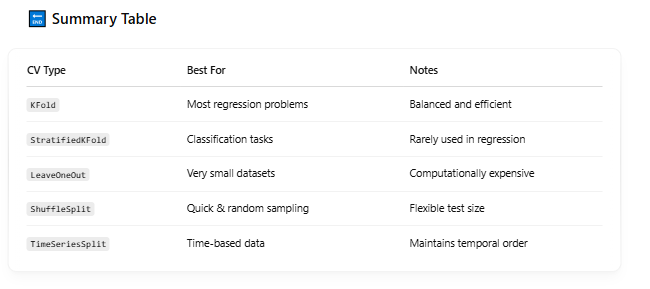

### 1) Apply Cross validation along with Kflods = 5 and Check if Model with Linear Reg degree =1 improves

In [49]:
# 1) Apply Cross-Validation with Linear Regression Model
# 1) KFold Cross validation
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold, cross_val_score


KfoldLrModel = LinearRegression()


# Step 2: Create KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Apply cross-validation on training data
cv_scores = cross_val_score(KfoldLrModel, X_train, y_train, cv=kf, scoring='r2')

    
# Step 4: Display the results
print("R² scores on Training Data for each fold:", cv_scores)
print("Mean R² score:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Custom scorers (because sklearn uses negative values for loss-type metrics)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

cv_mae = cross_val_score(KfoldLrModel, X_train, y_train, cv=kf, scoring=mae_scorer)
# print("MAE (Negative):", cv_mae)
print("Mean MAE:", -np.mean(cv_mae))

# MSE
cv_mse = cross_val_score(KfoldLrModel, X_train, y_train, cv=kf, scoring=mse_scorer)
# print("MSE (Negative):", cv_mse)
print("Mean MSE:", -np.mean(cv_mse))

R² scores on Training Data for each fold: [0.72688072 0.70972831 0.77480544 0.71013602 0.77744895]
Mean R² score: 0.7397998857581215
Standard Deviation: 0.030311682033172804
Mean MAE: 4221.4223479107195
Mean MSE: 37600518.294166185


- Model Didnt improve when Kfolds =5 with cv applied to Linear Regression (Degree =1)

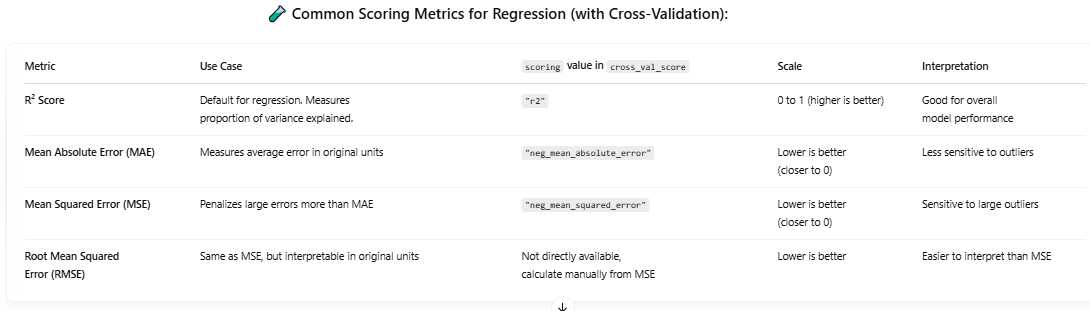

## 2) Apply Regularization Techniques and check the performance of the Model with Linear Reg (degree =1) with alpha = 0.1

In [53]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ridge and Lasso models with alpha = 1.0 (arbitrary value)
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

# --------------------- Ridge ---------------------
# R² Scores
ridge_r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='r2')
print("Ridge R² Scores:", ridge_r2_scores)
print("Ridge Mean R²:", round(ridge_r2_scores.mean(), 4))

# MAE Scores (negative, so we take -1 * mean)
ridge_mae_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
print("Ridge Mean MAE:", round(-ridge_mae_scores.mean(), 4))

# MSE Scores (negative, so we take -1 * mean)
ridge_mse_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("Ridge Mean MSE:", round(-ridge_mse_scores.mean(), 4))

print("\n" + "-"*50 + "\n")

# --------------------- Lasso ---------------------
# R² Scores
lasso_r2_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='r2')
print("Lasso R² Scores:", lasso_r2_scores)
print("Lasso Mean R²:", round(lasso_r2_scores.mean(), 4))

# MAE Scores
lasso_mae_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
print("Lasso Mean MAE:", round(-lasso_mae_scores.mean(), 4))

# MSE Scores
lasso_mse_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("Lasso Mean MSE:", round(-lasso_mse_scores.mean(), 4))


Ridge R² Scores: [0.72684261 0.70974595 0.7748299  0.71015029 0.77744922]
Ridge Mean R²: 0.7398
Ridge Mean MAE: 4222.9523
Ridge Mean MSE: 37600166.8225

--------------------------------------------------

Lasso R² Scores: [0.72687664 0.70975092 0.77481789 0.71014132 0.77743684]
Lasso Mean R²: 0.7398
Lasso Mean MAE: 4221.3035
Lasso Mean MSE: 37599857.7389


Conclusion on Lasso Regularization:

- The use of Lasso Regression resulted in only a slight improvement in R² score and MAE.

- However, this improvement indicates that Lasso helped in removing features with low predictive value, thereby simplifying the model without compromising performance.

Reasons:
1) Lasso Regularization (L1):
- It adds a penalty equal to the absolute value of the coefficients.
- This can shrink some coefficients exactly to zero, effectively eliminating unimportant features (feature selection).

2)Negligible Change in Metrics:
- If the R² and MAE didn’t improve significantly, it means:
   - The removed features weren’t contributing much anyway.
   - The dataset might already be optimized or contain mostly relevant features.

3) Still Valuable:
- Even with similar performance, Lasso is useful because it simplifies the model by reducing dimensionality, making it more interpretable and sometimes more robust to overfitting.

## 3) Apply Regualarization technique with a range of alpha values combined with GridSearch Cv to determine the best params i.e., Alpha value for the Linear Reg Model (Degree =2)

In [56]:
# 3) Detrmining the best suited vlues of alpha for improved model performance 
from sklearn.linear_model import Ridge

## So we ave to use grid search cv for this 
## Noow try a range of values for aplha = [0.001, 0.01, 0.1, 1, 10, 100]
from sklearn.model_selection import GridSearchCV

# Define alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]


# Create Ridge regression model
ridge = Ridge()

# Set up GridSearchCV
ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alpha_values}, cv=5, scoring='r2')

# Fit on training data
ridge_cv.fit(X_train, y_train)

# Best alpha
print("Best Alpha for Ridge:", ridge_cv.best_params_['alpha'])
print("Best R² Score:", ridge_cv.best_score_)




# Best model from GridSearchCV
best_ridge_model = ridge_cv.best_estimator_

# Predict on test data
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

print("\nEvaluation Metrics for Best Ridge Model on Test Data:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

Best Alpha for Ridge: 10
Best R² Score: 0.7340008487986888

Evaluation Metrics for Best Ridge Model on Test Data:
Mean Absolute Error (MAE): 4201.46
Mean Squared Error (MSE): 33709591.85
Root Mean Squared Error (RMSE): 5806.0


In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Create Lasso regression model
lasso = Lasso()

# Set up GridSearchCV
lasso_cv = GridSearchCV(lasso, param_grid={'alpha': alpha_values}, cv=5, scoring='r2')

# Fit on training data
lasso_cv.fit(X_train, y_train)

# Best alpha
print("Best Alpha for Lasso:", lasso_cv.best_params_['alpha'])
print("Best R² Score:", lasso_cv.best_score_)

# Best model from GridSearchCV
best_lasso_model = lasso_cv.best_estimator_

# Predict on test data
y_pred_lasso = best_lasso_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print("\nEvaluation Metrics for Best Lasso Model on Test Data:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Best Alpha for Lasso: 100
Best R² Score: 0.7343486181061001

Evaluation Metrics for Best Lasso Model on Test Data:
Mean Absolute Error (MAE): 4195.35
Mean Squared Error (MSE): 33888487.69
Root Mean Squared Error (RMSE): 5821.38


Conclusion on Hyperparameter Tuning with Lasso:
- Training the Lasso model with GridSearchCV to select the optimal alpha resulted in better performance compared to using an arbitrary alpha.
- This highlights the importance of hyperparameter tuning using GridSearchCV with Cross-Validation to improve model performance effectively and reliably.

- When using GridSearchCV, the Lasso-regularized Linear Regression model performed better compared to when trained with an arbitrary value of alpha.
- This indicates that hyperparameter tuning using GridSearchCV with Cross-Validation helps in selecting the most optimal parameters, leading to improved model performance.
- Therefore, it is a good practice to apply GridSearchCV when using regularized models like Lasso or Ridge to find the best alpha value instead of choosing it arbitrarily.

Reasons :
1) Arbitrary Alpha:
- Choosing an alpha (regularization strength) without testing may underfit or overfit the model.
- It lacks justification and often doesn't give the best performance.

2) GridSearchCV with Cross-Validation:
- Tries multiple values of alpha systematically.
- Uses cross-validation to evaluate each setting, ensuring the result generalizes well.
- Prevents overfitting or underfitting by selecting the best-performing hyperparameter.

3) Applies to All Models with Hyperparameters:
- This best practice extends beyond Lasso to Ridge, ElasticNet, Decision Trees, SVMs, etc.



## 4) Trained Model using Polynomial reg with Degree = 2 and Degree = 3, to check if the Polynmial Regression model performs better than the Linear Regression model


In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as nptra

# Function to train and evaluate polynomial regression
def evaluate_polynomial_regression(degree, X_train, X_test, y_train, y_test):
    # Step 1: Create Polynomial Features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Step 2: Train Linear Regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Step 3: Predict
    y_pred = model.predict(X_test_poly)

    # Step 4: Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Step 5: Display metrics
    print(f"\nEvaluation Metrics for Polynomial Regression (Degree {degree}):")
    print("R² Score:", round(r2, 4))
    print("Mean Absolute Error (MAE):", round(mae, 2))
    print("Mean Squared Error (MSE):", round(mse, 2))
    print("Root Mean Squared Error (RMSE):", round(rmse, 2))

# Call the function for Degree 2 and Degree 3
evaluate_polynomial_regression(2, X_train, X_test, y_train, y_test)
evaluate_polynomial_regression(3, X_train, X_test, y_train, y_test)



Evaluation Metrics for Polynomial Regression (Degree 2):
R² Score: 0.8678
Mean Absolute Error (MAE): 2729.67
Mean Squared Error (MSE): 20522574.36
Root Mean Squared Error (RMSE): 4530.18

Evaluation Metrics for Polynomial Regression (Degree 3):
R² Score: 0.8618
Mean Absolute Error (MAE): 2706.58
Mean Squared Error (MSE): 21454885.22
Root Mean Squared Error (RMSE): 4631.94


#### Based on both the model evaluation metrics and initial data exploration (like the correlation matrix), Polynomial Regression (with degree 2 or 3) combined with cross-validated regularization appears to be a better fit than simple linear regression for this dataset.
- Overall, Polynomial Regression models with degree 2 and 3 performed better than the Linear Regression model (degree = 1), especially when combined with the best-suited alpha value through regularization (Ridge or Lasso).
- Although the performance difference between degree 2 and degree 3 was minimal, it indicates that Polynomial Regression fits the data better than a simple linear model.
- This aligns with our earlier correlation matrix observations, where some features showed strong correlation with the target while others showed weak or non-linear relationships.
- These initial signs suggested that a simple Linear Regression model may not be sufficient, and a non-linear model like Polynomial Regression could provide better predictions.

Reasons :
1)Polynomial Regression captures non-linearity:
- If data shows curves or interactions, polynomial models model that better than a straight-line fit (degree=1).
2)Correlation matrix supports this:
- A weak linear correlation doesn't mean the feature is useless—it could have a non-linear relationship, which polynomial regression captures.
3)Regularization helps:
- Regularization (Ridge or Lasso) improves performance by reducing overfitting and helping with multicollinearity, especially in higher-degree polynomials.

## 5) Apply GridSearch Cv with KFold to check for further improvement of the Polynomial Regression Model with Dergree =2 and Degress =3 combined with Lasso and Ridge Regularization techniques 

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
# Define alpha range
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Function to apply Polynomial Regression with Ridge or Lasso + GridSearchCV
def poly_reg_with_regularization(degree, model_type, X_train, X_test, y_train, y_test):
    if model_type == 'ridge':
        model = Ridge()
        print(f"\nRidge Regression with Polynomial Degree {degree}")
    elif model_type == 'lasso':
        model = Lasso(max_iter=10000)
        print(f"\nLasso Regression with Polynomial Degree {degree}")
    else:
        raise ValueError("model_type must be 'ridge' or 'lasso'")

    # Pipeline: PolynomialFeatures + Ridge/Lasso
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('regressor', model)
    ])

    # GridSearchCV with KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    param_grid = {'regressor__alpha': alpha_values}
    grid = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2')
    grid.fit(X_train, y_train)

    # Best model
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(" Best Alpha:", grid.best_params_['regressor__alpha'])
    print("Best CV R² Score:", round(grid.best_score_, 4))
    print("Evaluation on Test Set:")
    print("   R² Score:", round(r2, 4))
    print("   MAE:", round(mae, 2))
    print("   MSE:", round(mse, 2))
    print("   RMSE:", round(rmse, 2))

# Run for Degree 2 and 3
poly_reg_with_regularization(2, 'ridge', X_train, X_test, y_train, y_test)
poly_reg_with_regularization(3, 'ridge', X_train, X_test, y_train, y_test)
poly_reg_with_regularization(2, 'lasso', X_train, X_test, y_train, y_test)
poly_reg_with_regularization(3, 'lasso', X_train, X_test, y_train, y_test)


Ridge Regression with Polynomial Degree 2
 Best Alpha: 10
Best CV R² Score: 0.8348
Evaluation on Test Set:
   R² Score: 0.8677
   MAE: 2744.45
   MSE: 20535874.55
   RMSE: 4531.65

Ridge Regression with Polynomial Degree 3
 Best Alpha: 100
Best CV R² Score: 0.8293
Evaluation on Test Set:
   R² Score: 0.8635
   MAE: 2839.75
   MSE: 21185740.43
   RMSE: 4602.8

Lasso Regression with Polynomial Degree 2


C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.835e+09, tolerance: 1.202e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.923e+09, tolerance: 1.233e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+10, toleranc

 Best Alpha: 100
Best CV R² Score: 0.8353
Evaluation on Test Set:
   R² Score: 0.8679
   MAE: 2751.92
   MSE: 20509984.99
   RMSE: 4528.8

Lasso Regression with Polynomial Degree 3


C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.244e+09, tolerance: 1.202e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.422e+09, tolerance: 1.233e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.404e+09, toleranc

 Best Alpha: 100
Best CV R² Score: 0.8339
Evaluation on Test Set:
   R² Score: 0.8676
   MAE: 2749.95
   MSE: 20555947.96
   RMSE: 4533.87


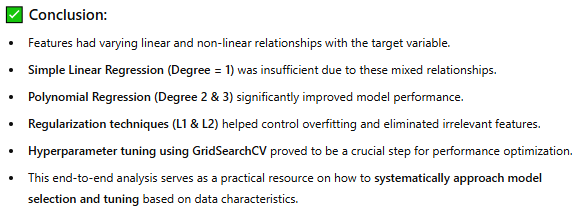

## 6) Apply Decission Tree Regressor to Train the model and check if the performnce improves
- A Decision Tree Regressor is a type of machine learning algorithm used for predicting continuous numeric values (i.e., for regression tasks), using a tree-like model of decisions.

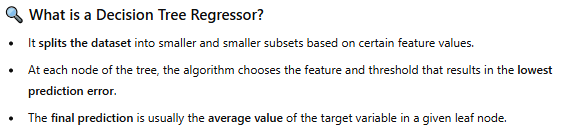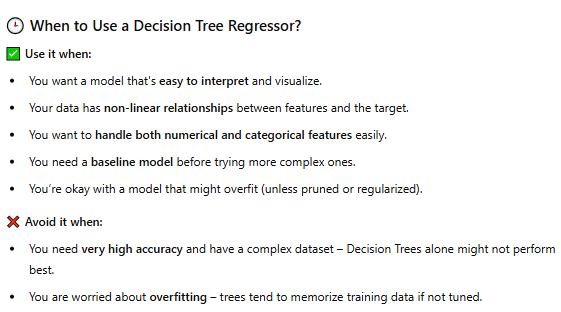

In [68]:
from sklearn.tree import DecisionTreeRegressor


In [69]:
# Initialize the model
dt_model = DecisionTreeRegressor(max_depth=None, random_state=42)

In [70]:
# Fit the model on training data
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [71]:
# Predict on test data
y_pred_dt = dt_model.predict(X_test)

In [72]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

In [73]:
# Print evaluation results
print("Decision Tree Regressor Evaluation Metrics:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 2))


Decision Tree Regressor Evaluation Metrics:
Mean Absolute Error (MAE): 2976.56
Mean Squared Error (MSE): 45186900.81
Root Mean Squared Error (RMSE): 6722.12
R² Score: 0.71


## 7) Decision Tree  Regressor with Hyper parameter Tunning with cv = 5

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameter = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [76]:
regressor = DecisionTreeRegressor(random_state=42)

In [77]:
# Set up GridSearchCV
model = GridSearchCV(estimator=regressor,
                           param_grid=parameter,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

In [78]:
# Fit the model on training data
model.fit(X_train, y_train)


C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
440 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
351 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\bhosa\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [79]:
# Print results
print("Best Hyperparameters:", model.best_params_)

Best Hyperparameters: {'criterion': 'poisson', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'best'}


In [80]:
# Get the best model
best_dt_model = model.best_estimator_

In [81]:
# Predict on test data with best params
y_pred = best_dt_model.predict(X_test)


In [82]:
#### Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [83]:
# Print Results
print("Evaluation Metrics for Decision Tree Regressor with Best Hyperparameters:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 2))

Evaluation Metrics for Decision Tree Regressor with Best Hyperparameters:
Mean Absolute Error (MAE): 3068.42
Mean Squared Error (MSE): 23884316.77
Root Mean Squared Error (RMSE): 4887.16
R² Score: 0.85


In [84]:
from sklearn.tree import plot_tree


[Text(0.5, 0.9, 'x[4] <= 0.732\npoisson = 4612.75\nsamples = 1070\nvalue = 13346.09'),
 Text(0.25, 0.7, 'x[0] <= 0.234\npoisson = 1905.034\nsamples = 850\nvalue = 8578.323'),
 Text(0.125, 0.5, 'x[0] <= -1.19\npoisson = 1497.612\nsamples = 467\nvalue = 5481.222'),
 Text(0.0625, 0.3, 'x[2] <= -0.456\npoisson = 1673.989\nsamples = 136\nvalue = 3364.762'),
 Text(0.03125, 0.1, 'poisson = 313.124\nsamples = 48\nvalue = 2261.692'),
 Text(0.09375, 0.1, 'poisson = 2253.818\nsamples = 88\nvalue = 3966.436'),
 Text(0.1875, 0.3, 'x[1] <= -0.01\npoisson = 1164.562\nsamples = 331\nvalue = 6350.825'),
 Text(0.15625, 0.1, 'poisson = 996.314\nsamples = 170\nvalue = 6430.108'),
 Text(0.21875, 0.1, 'poisson = 1341.14\nsamples = 161\nvalue = 6267.111'),
 Text(0.375, 0.5, 'x[2] <= -1.082\npoisson = 888.414\nsamples = 383\nvalue = 12354.682'),
 Text(0.3125, 0.3, 'x[0] <= 0.946\npoisson = 204.7\nsamples = 39\nvalue = 10237.491'),
 Text(0.28125, 0.1, 'poisson = 62.066\nsamples = 21\nvalue = 8690.743'),
 Text(

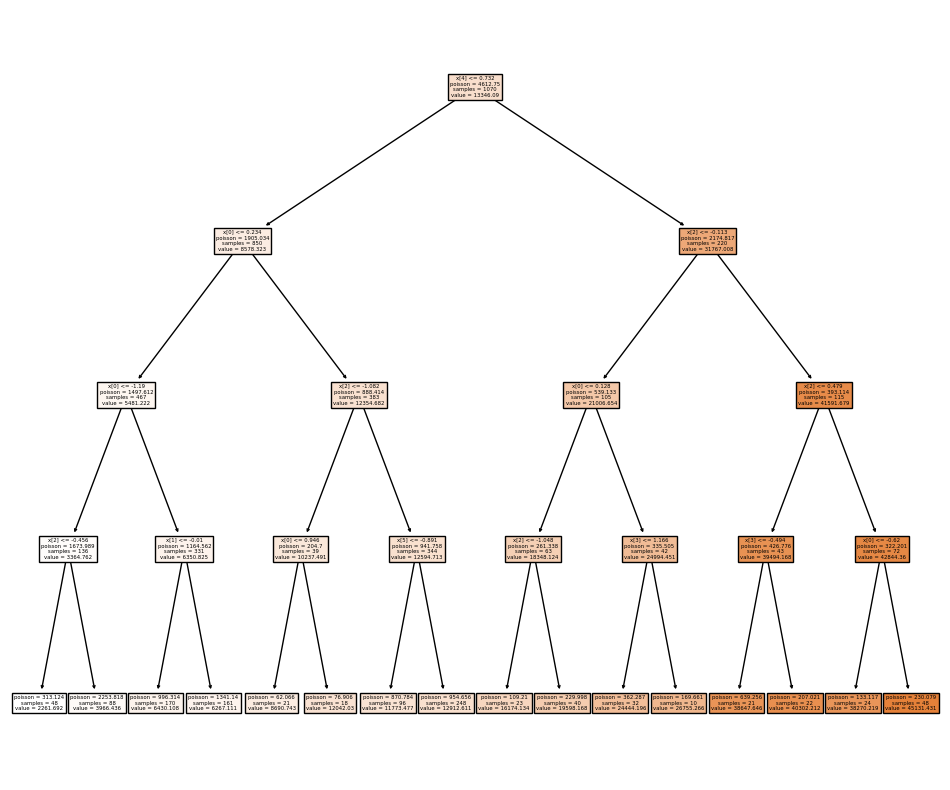

In [85]:
from sklearn import tree
plt.figure(figsize =  (12,10))
tree.plot_tree(best_dt_model,filled=True)

## 8) Apply Support Vector Regressor and check if it improves the Model performance
Instead of trying to minimize the error like most regression models do (like linear regression), SVR tries to:

🔹 Fit the best line (or curve) through the data so that most of the data points fall within a certain margin (epsilon) from that line.
🔹 It’s okay if some points fall outside this margin, but it tries to minimize those violations.

So you don’t just want a line that’s close to the points — you want a tube around the line where most points lie. This “tube” is controlled by the epsilon parameter.

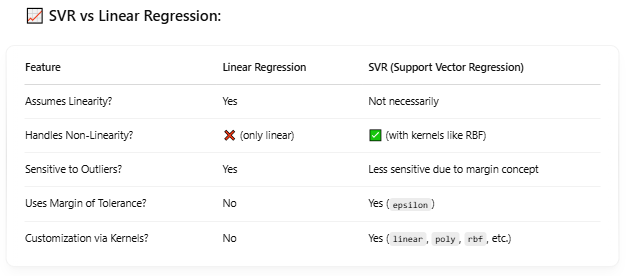 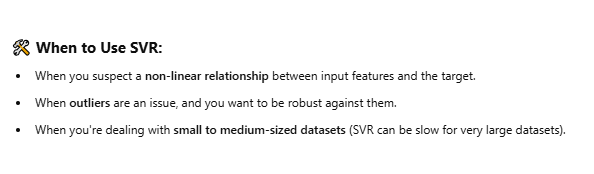

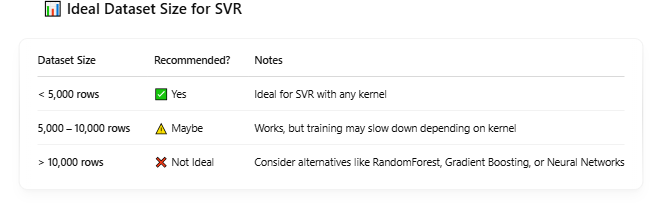

In [88]:
from sklearn.svm import SVR


In [89]:
# Scale the features (SVR is sensitive to feature scaling)
scaler_X = StandardScaler()
scaler_y = StandardScaler()


- Always apply StandardScaler (or MinMaxScaler) to both X and y before training an SVR model.

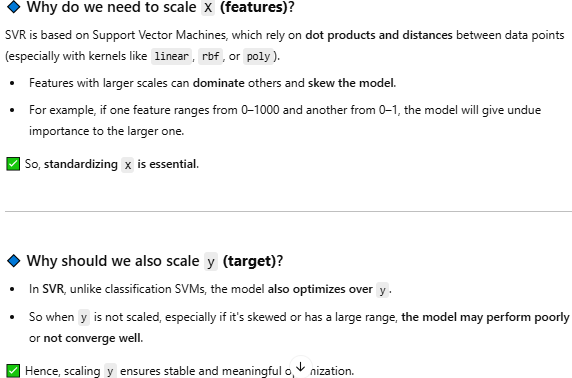

In [91]:
# Fit and transform the training data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

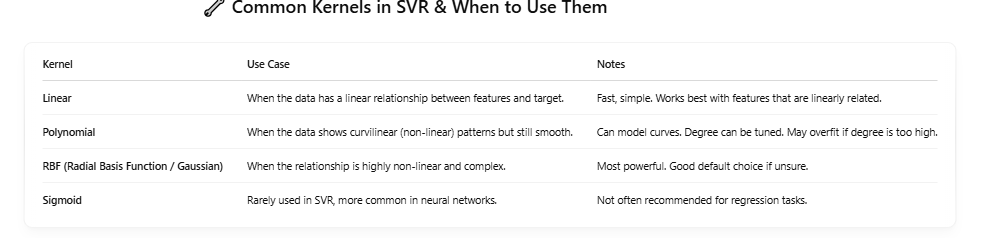

## 9) Train model using kernel = Linear

In [93]:
# Initialize the SVR model with linear kernel
svr_linear = SVR(kernel='linear')

In [94]:
# Train the model
svr_linear.fit(X_train_scaled, y_train_scaled)

SVR(kernel='linear')

In [95]:
# Predict on test data
y_pred_scaled = svr_linear.predict(X_test_scaled)

In [96]:
# Inverse transform the predicted values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [97]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [98]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [99]:
# Print metrics
print("Evaluation Metrics for SVR (Linear Kernel):")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 2))

Evaluation Metrics for SVR (Linear Kernel):
Mean Absolute Error (MAE): 3289.48
Mean Squared Error (MSE): 40045161.19
Root Mean Squared Error (RMSE): 6328.12
R² Score: 0.74


## 10) Train Model using Kernel = Poly

In [101]:
# Train SVR model with polynomial kernel
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)
svr_poly.fit(X_train_scaled, y_train_scaled)

SVR(kernel='poly')

In [102]:
# Predict on test data
y_pred_scaled = svr_poly.predict(X_test_scaled)

# Inverse transform to get original scale of predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [103]:
print("SVR with Polynomial Kernel Evaluation:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))

SVR with Polynomial Kernel Evaluation:
MAE: 2338.54
MSE: 21802320.0
RMSE: 4669.3
R² Score: 0.86


## 11) Train Model using Kernel = RBF

In [105]:
# Train SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_scaled = svr_rbf.predict(X_test_scaled)

# Inverse transform predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [106]:
# Print Results
print("SVR with RBF Kernel Evaluation:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))

SVR with RBF Kernel Evaluation:
MAE: 2456.87
MSE: 20937178.94
RMSE: 4575.72
R² Score: 0.87


- We conclude that SVR model performs well on Poly and even better on RBF kernel 
- Lets try Hyperparameter tunning for finding values for C, gamma, and epsilon

## 12) Train the SVR model with kernel= RBF and do Hyperpraameter Tunning to see if theres any scope of improving the model 

In [109]:
from sklearn.model_selection import GridSearchCV


In [110]:
# Step 3: Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

In [111]:
# Step 4: Use GridSearchCV
grid_search = GridSearchCV(estimator=svr_rbf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'gamma': ['scale', 0.01, 0.1, 1]},
             scoring='r2')

In [112]:
# Step 5: Best Parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}


In [113]:
# Step 6: Predict and evaluate
best_model = grid_search.best_estimator_
y_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform predictions to get actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
# y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [114]:
print("\nEvaluation Metrics on Test Data (Best SVR - RBF Kernel):")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 4))


Evaluation Metrics on Test Data (Best SVR - RBF Kernel):
MAE: 2473.73
MSE: 20877714.54
RMSE: 4569.21
R2 Score: 0.8655


Conclusion:

- Since the dataset contained fewer than 5,000 records, Support Vector Regression (SVR) performed efficiently and yielded strong results, particularly when using RBF and Polynomial kernels.

- Based on the current experiments and performance metrics, SVR appears to be one of the best-suited regression models for this insurance dataset, especially considering its ability to handle non-linear relationships in smaller datasets.

Reasons:
- SVR excels in capturing non-linear patterns through kernel functions.

- It’s computationally feasible for datasets with size < 5000.

- Your dataset (like the Insurance dataset) often contains non-linear dependencies between features like bmi, age, children, and charges, which SVR handles well — especially with RBF or polynomial kernels.

## To improve the performanceof your model, especially for a regression problem like the insurance dataset try Ensemble Tree-Based Models

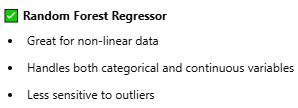 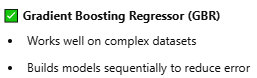
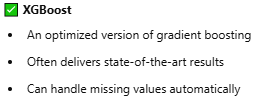 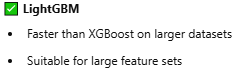
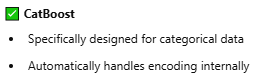

- Since our dataset contains fewer than 5000 records, there's no strict need to use LightGBM, which is typically optimized for large-scale datasets.

- The data includes both categorical and numerical features, making it a good candidate for tree-based models like Random Forest Regressor, which naturally handle mixed data types without requiring feature scaling.

- The dataset exhibits non-linear relationships, as observed by the better performance of SVR with poly and rbf kernels compared to the linear kernel. This further supports the use of non-linear models such as Random Forest, Gradient Boosting, or XGBoost.

- Given that this is medical data, natural outliers are expected (e.g., extreme BMI, charges, or age values), and removing them could lead to data loss. Tree-based models like Random Forest are robust to such outliers, unlike distance-based models.

- Missing values were already handled during the EDA phase, but this doesn't disqualify XGBoost, which is still worth testing due to its boosting framework and ability to capture complex patterns with regularization.

- While CatBoost is specifically optimized for datasets with high-cardinality categorical features, it also handles mixed-type data efficiently. Even though the dataset isn't fully categorical, CatBoost could still be experimented with to evaluate performance.

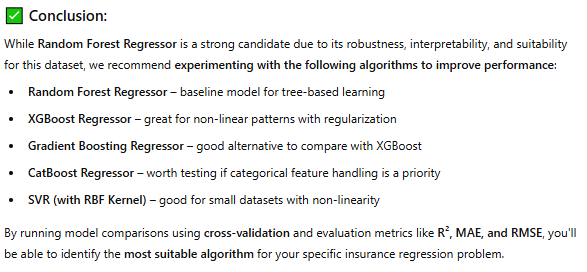